In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from skimage.metrics import structural_similarity as ssim

In [ ]:
def draw_picture(image, title, bgr=False):
  b, g, r = cv2.split(image) 
  new_image = cv2.merge([r, g, b])
  plt.figure(figsize=(7, 5))
  plt.axis('off')
  plt.imshow(new_image)
  plt.title(title)
  plt.show()

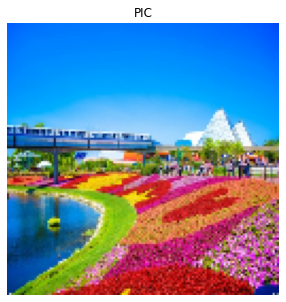

In [ ]:
image = cv2.imread('YArkaya-klumba-Bright-flower-bed-6000x4000-700x466.jpg')
image = cv2.resize(image, (128, 128))
draw_picture(image, 'PIC')

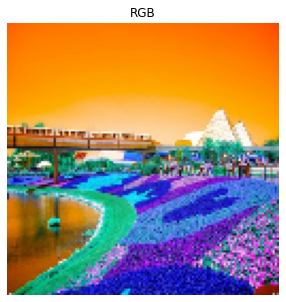

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
draw_picture(image, 'RGB')

In [ ]:
def k_means(image, n):  
  image_reshape = image.reshape(-1, 3)
  km = KMeans(n_clusters=n)
  img_data = km.fit(image_reshape)
  new_image = img_data.cluster_centers_[img_data.labels_]
  new_image = new_image.reshape(image.shape)
  score = ssim(image, new_image, multichannel=True, data_range=new_image.max() - new_image.min())
  draw_picture(np.array(new_image,np.int32), f'Kmeans {n}, ssim: {score}', bgr=False)

In [ ]:
clasters = [2, 5, 10, 20]

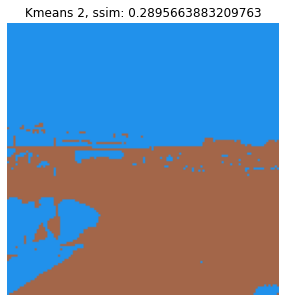

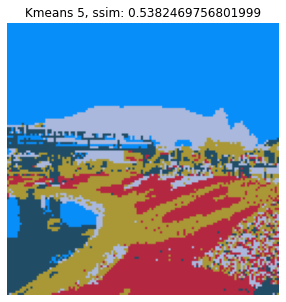

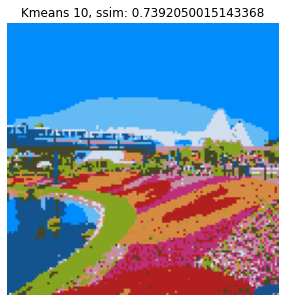

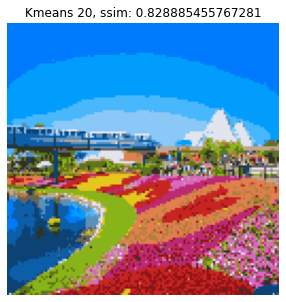

In [ ]:
for c in clasters:
  k_means(image, c)

In [ ]:
def db_scan(image, e): 
  image_reshape = image.reshape(-1, 3)
  db = DBSCAN(eps=e)
  img_data = db.fit(image_reshape)
  end_data = img_data.components_[img_data.labels_].reshape(image.shape)
  score = ssim(image, end_data, multichannel=True, data_range=end_data.max() - end_data.min())
  draw_picture(np.array(end_data,np.int32), f'Eps {e}, ssim: {score}', bgr=False)

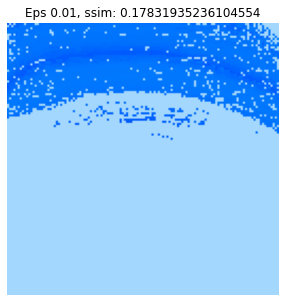

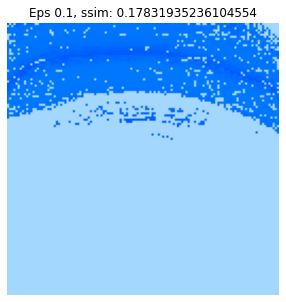

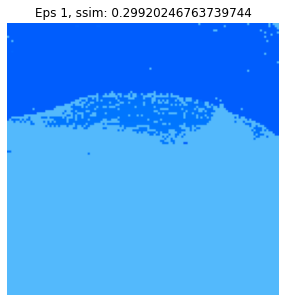

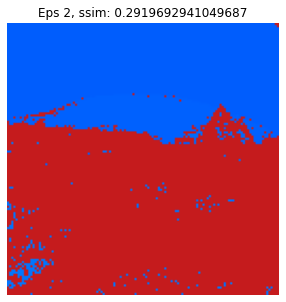

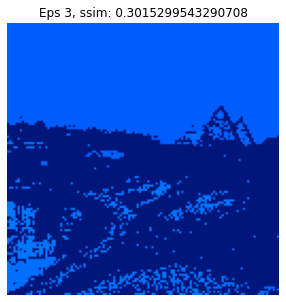

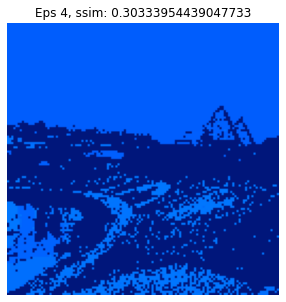

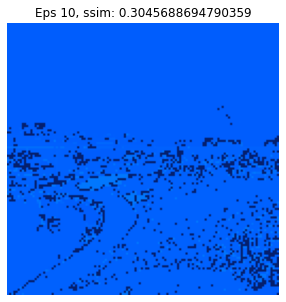

In [ ]:
for e in [0.01,0.1,1,2,3,4,10]:
  db_scan(image, e)

In [ ]:
def a_clastering(image, n):  
  image_reshape = image.reshape(-1, 3)
  a_c = AgglomerativeClustering(n_clusters=n)
  img_data = a_c.fit(image_reshape)
  new_image = np.array(np.column_stack((img_data.labels_.reshape(-1,1), image_reshape[:,[1,2]])), np.int32).reshape(image.shape)
  score = ssim(image, new_image, multichannel=True, data_range=new_image.max() - new_image.min())
  draw_picture(np.array(new_image,np.int32), f'Clusters {n}, ssim: {score}', bgr=False)

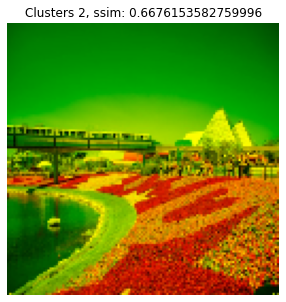

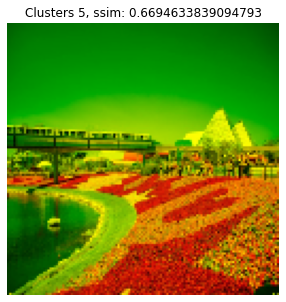

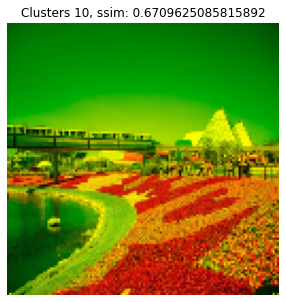

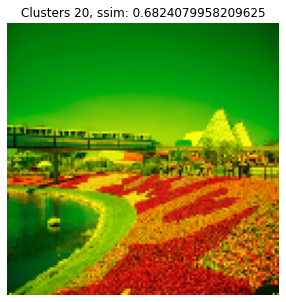

In [ ]:
for n in clasters:
  a_clastering(image, n)

По видимым результатам можно сказать, что KMeans отработал лучше чем AgglomerativeClustering и одни оба сработали лучше чем BDscan